In [158]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [184]:
rios = list(shpreader.Reader('/mnt/Data/shape/America_Sul/Rios/Hidrografia_Sudamérica.shp').geometries())
andes = list(shpreader.Reader('/mnt/Data/shape/Andes/height/andes_1000.shp').geometries())

In [160]:
viridis = cm.get_cmap('viridis', 6)
newcolors = viridis(np.arange(0, 6, 1))

color0 = np.array([178/256, 115/256, 115/256, 1])
color1 = np.array([241/256, 115/256, 115/256, 1])
color2 = np.array([255/256, 208/256, 115/256, 1])
color3 = np.array([219/256, 242/256, 255/256, 1])
color4 = np.array([115/256, 176/256, 255/256, 1])
color5 = np.array([115/256, 136/256, 178/256, 1])

newcolors[0, :] = color0
newcolors[1, :] = color1
newcolors[2, :] = color2
newcolors[3, :] = color3
newcolors[4, :] = color4
newcolors[5, :] = color5

cmp_boers_2013 = ListedColormap(newcolors)

# Colorbar to difference
viridis = cm.get_cmap('viridis', 6)
newcolors = viridis(np.arange(0, 6, 1))

color0 = np.array([178/256, 115/256, 115/256, 1])
color1 = np.array([241/256, 198/256, 115/256, 1])
color2 = np.array([186/256, 186/256, 186/256, 1])
color3 = np.array([219/256, 242/256, 255/256, 1])
color4 = np.array([115/256, 176/256, 255/256, 1])
color5 = np.array([115/256, 136/256, 178/256, 1])

newcolors[0, :] = color0
newcolors[1, :] = color1
newcolors[2, :] = color2
newcolors[3, :] = color3
newcolors[4, :] = color4
newcolors[5, :] = color5

cmp_boers_2013_diff = ListedColormap(newcolors)

In [193]:
data_input = '/mnt/Data/Data/TRMM/season/summer/3B42_1998_12_2013_02_1dy_05x05_summer.nc'
data = ca.read_netcdf(data_input,2)
lat = data['lat']
lon = data['lon']
pre = data['prec']

lon2d, lat2d = np.meshgrid(lon, lat)

pre_mean = np.nanmean(pre,axis=0)
pre_p90 = np.nanpercentile(pre,90,axis=0)
pre_p95 = np.nanpercentile(pre,95,axis=0)

time : (1354,)
lon : (110,)
lat : (120,)
prec : (1354, 120, 110)


In [194]:
data_input = '/mnt/Data/Data/IMERG/season/summer/IMERG_2000_12_2021_02_24h_05x05_summer.nc'
data = ca.read_netcdf(data_input,2)
lat_I = data['lat']
lon_I = data['lon']
pre_I = data['pre']

lon2d_I, lat2d_I = np.meshgrid(lon_I, lat_I)

pre_mean_I = np.nanmean(pre_I,axis=0)
pre_p90_I = np.nanpercentile(pre_I,90,axis=0)
pre_p95_I = np.nanpercentile(pre_I,95,axis=0)

time : (1895,)
lon : (110,)
lat : (120,)
pre : (1895, 120, 110)


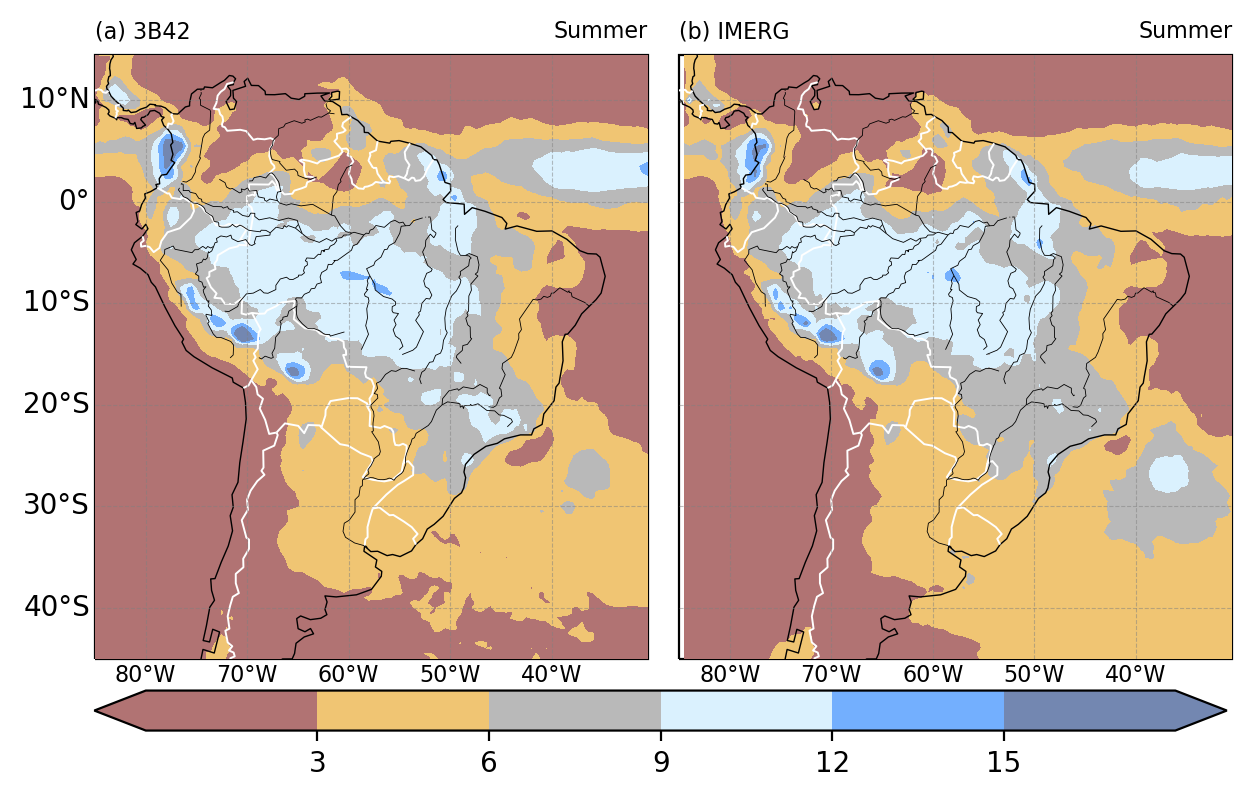

In [217]:
fontsize_axis = 8
fontsize_title = 8
linewidth_shape = 0.3

levels_m = np.arange(0,21,3)
ticks_m = np.arange(3,18,3)

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7.5,4),dpi=200)
gs = gridspec.GridSpec(1,2)

#================================================================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,pre_mean,levels=levels_m,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Summer',fontsize=fontsize_title, loc='right')
ax1.set_title('(a) 3B42',fontsize=fontsize_title, loc='left')
# plt.colorbar(a1,ticks=ticks_m)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,pre_mean_I,levels=levels_m,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Summer',fontsize=fontsize_title, loc='right')
ax1.set_title('(b) IMERG',fontsize=fontsize_title, loc='left')
# plt.colorbar(a1,ticks=ticks_m)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.01)

cbaxes = fig.add_axes([0.133, 0.035, 0.755, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=ticks_m,orientation="horizontal")

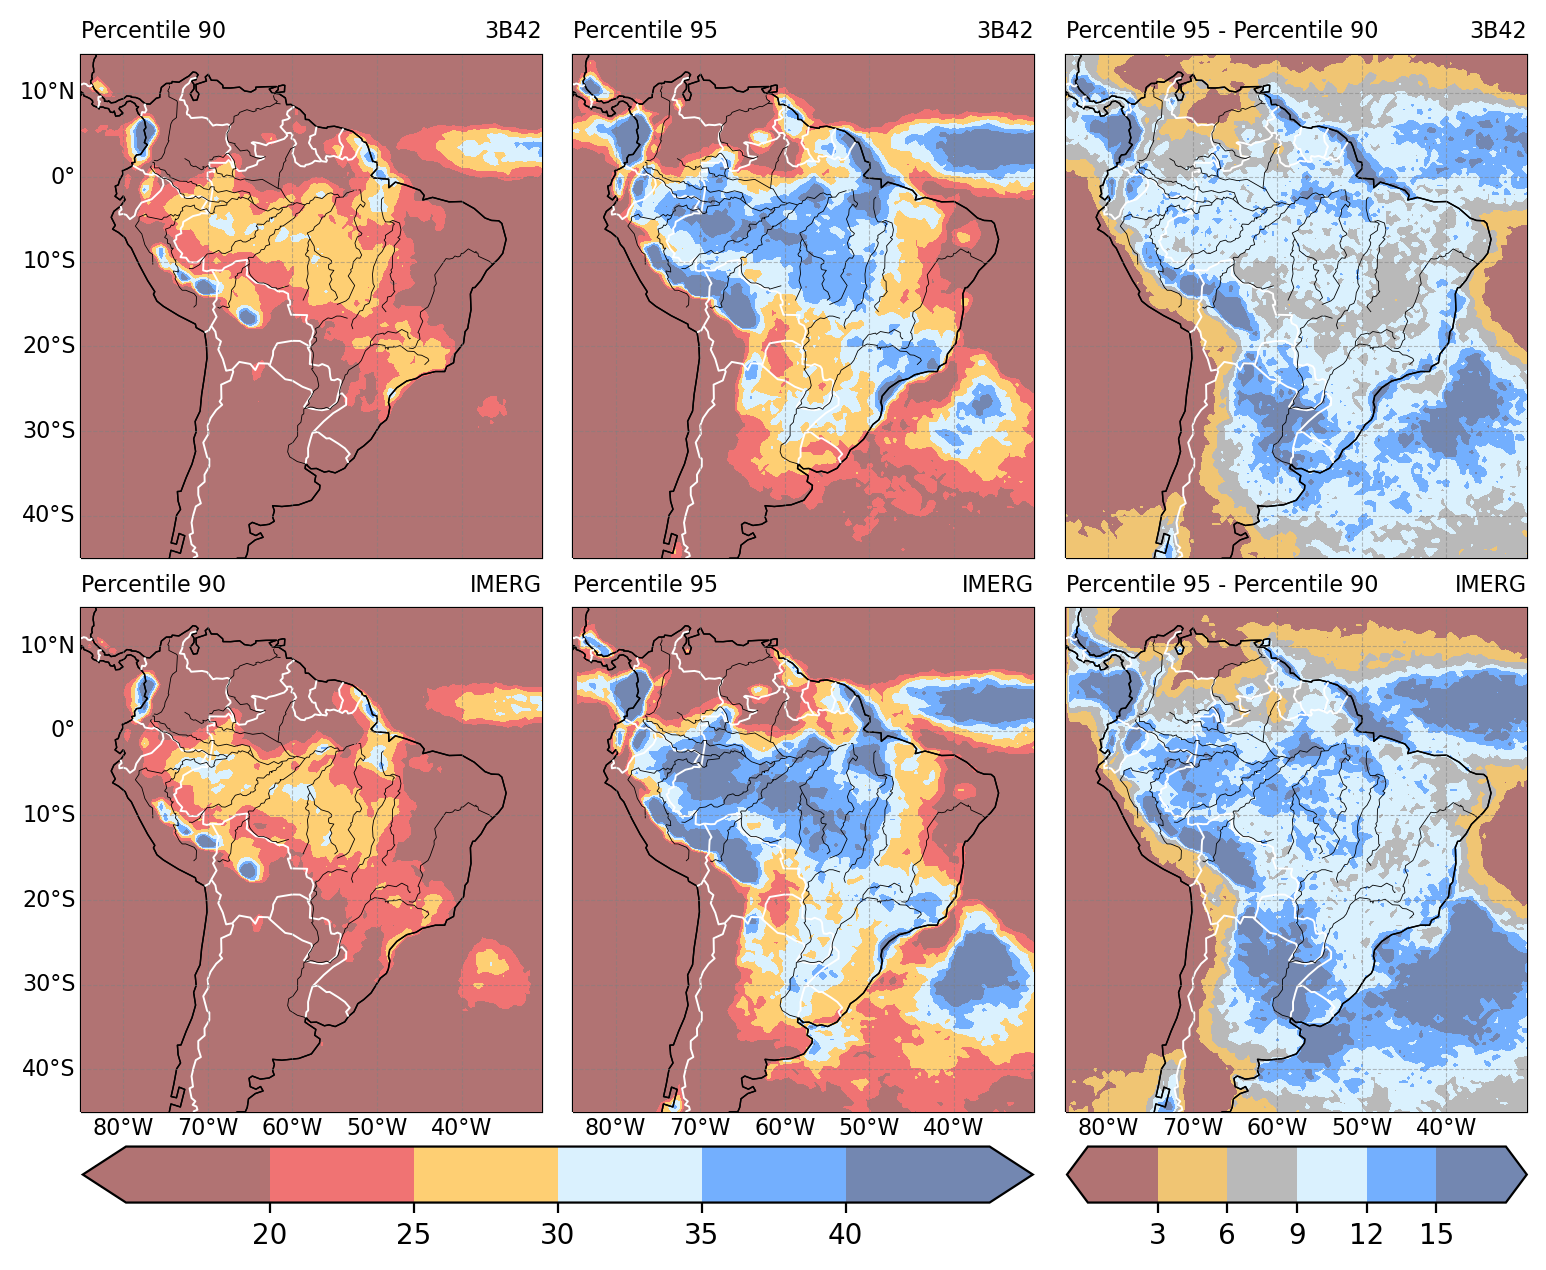

In [178]:
fontsize_title = 8
linewidth_shape = 0.3

levels_p = np.arange(15,50,5)
ticks_p = np.arange(20,45,5)

levels_diff = np.arange(0,21,3)
ticks_diff = np.arange(3,18,3)

cmap = plt.get_cmap('rainbow')

fontsize_axis = 8

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9.5,7),dpi=200)
gs = gridspec.GridSpec(2,3)

#================================================================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,pre_p90,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Percentile 90',fontsize=fontsize_title, loc='left')
ax1.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a1,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,pre_p95,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95',fontsize=fontsize_title, loc='left')
ax2.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a2,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[0, 2], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a3 = ax2.contourf(lon2d,lat2d,pre_p95-pre_p90,levels=levels_diff,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95 - Percentile 90',fontsize=fontsize_title, loc='left')
ax2.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a3,fraction=0.045,ticks=ticks_diff)

#================================================================================================================

ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.coastlines(linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d_I, lat2d_I,pre_p90_I,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Percentile 90',fontsize=fontsize_title, loc='left')
ax1.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a1,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d_I, lat2d_I,pre_p95_I,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95',fontsize=fontsize_title, loc='left')
ax2.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a2,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[1, 2], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(rios,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a3 = ax2.contourf(lon2d_I, lat2d_I,pre_p95_I-pre_p90_I,levels=levels_diff,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95 - Percentile 90',fontsize=fontsize_title, loc='left')
ax2.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a3,fraction=0.045,ticks=ticks_diff)

#================================================================================================================

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.01)

cbaxes = fig.add_axes([0.133, 0.060, 0.5, 0.04])
fig.colorbar(a1, cax = cbaxes,ticks=ticks_p,orientation="horizontal")

cbaxes = fig.add_axes([0.651, 0.060, 0.242, 0.04])
fig.colorbar(a3, cax = cbaxes,ticks=ticks_diff,orientation="horizontal")

salida = '../images/3B42_IMERG_summer.png'
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.05, facecolor='white')

In [179]:
data_input = '/mnt/Data/Data/TRMM/season/summer/3B42_1998_12_2013_02_1dy_05x05_summer.nc'
data = ca.read_netcdf(data_input,2)
lat = data['lat']
lon = data['lon']
pre = data['prec']

lon2d, lat2d = np.meshgrid(lon, lat)

pre = ca.remove_continent_ocean(pre, lat, lon, 'ocean')

pre_p90 = np.nanpercentile(pre,90,axis=0)
pre_p95 = np.nanpercentile(pre,95,axis=0)

time : (1354,)
lon : (110,)
lat : (120,)
prec : (1354, 120, 110)


/tmp/ipykernel_9178/929948479.py:11: RuntimeWarning: Mean of empty slice
  pre_mean = np.nanmean(pre,axis=0)
/home/arturo/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [180]:
data_input = '/mnt/Data/Data/IMERG/season/summer/IMERG_2000_12_2021_02_24h_05x05_summer.nc'
data = ca.read_netcdf(data_input,2)
lat_I = data['lat']
lon_I = data['lon']
pre_I = data['pre']

lon2d_I, lat2d_I = np.meshgrid(lon_I, lat_I)

pre_I = ca.remove_continent_ocean(pre_I, lat_I, lon_I, 'ocean')

pre_p90_I = np.nanpercentile(pre_I,90,axis=0)
pre_p95_I = np.nanpercentile(pre_I,95,axis=0)

time : (1895,)
lon : (110,)
lat : (120,)
pre : (1895, 120, 110)


/home/arturo/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


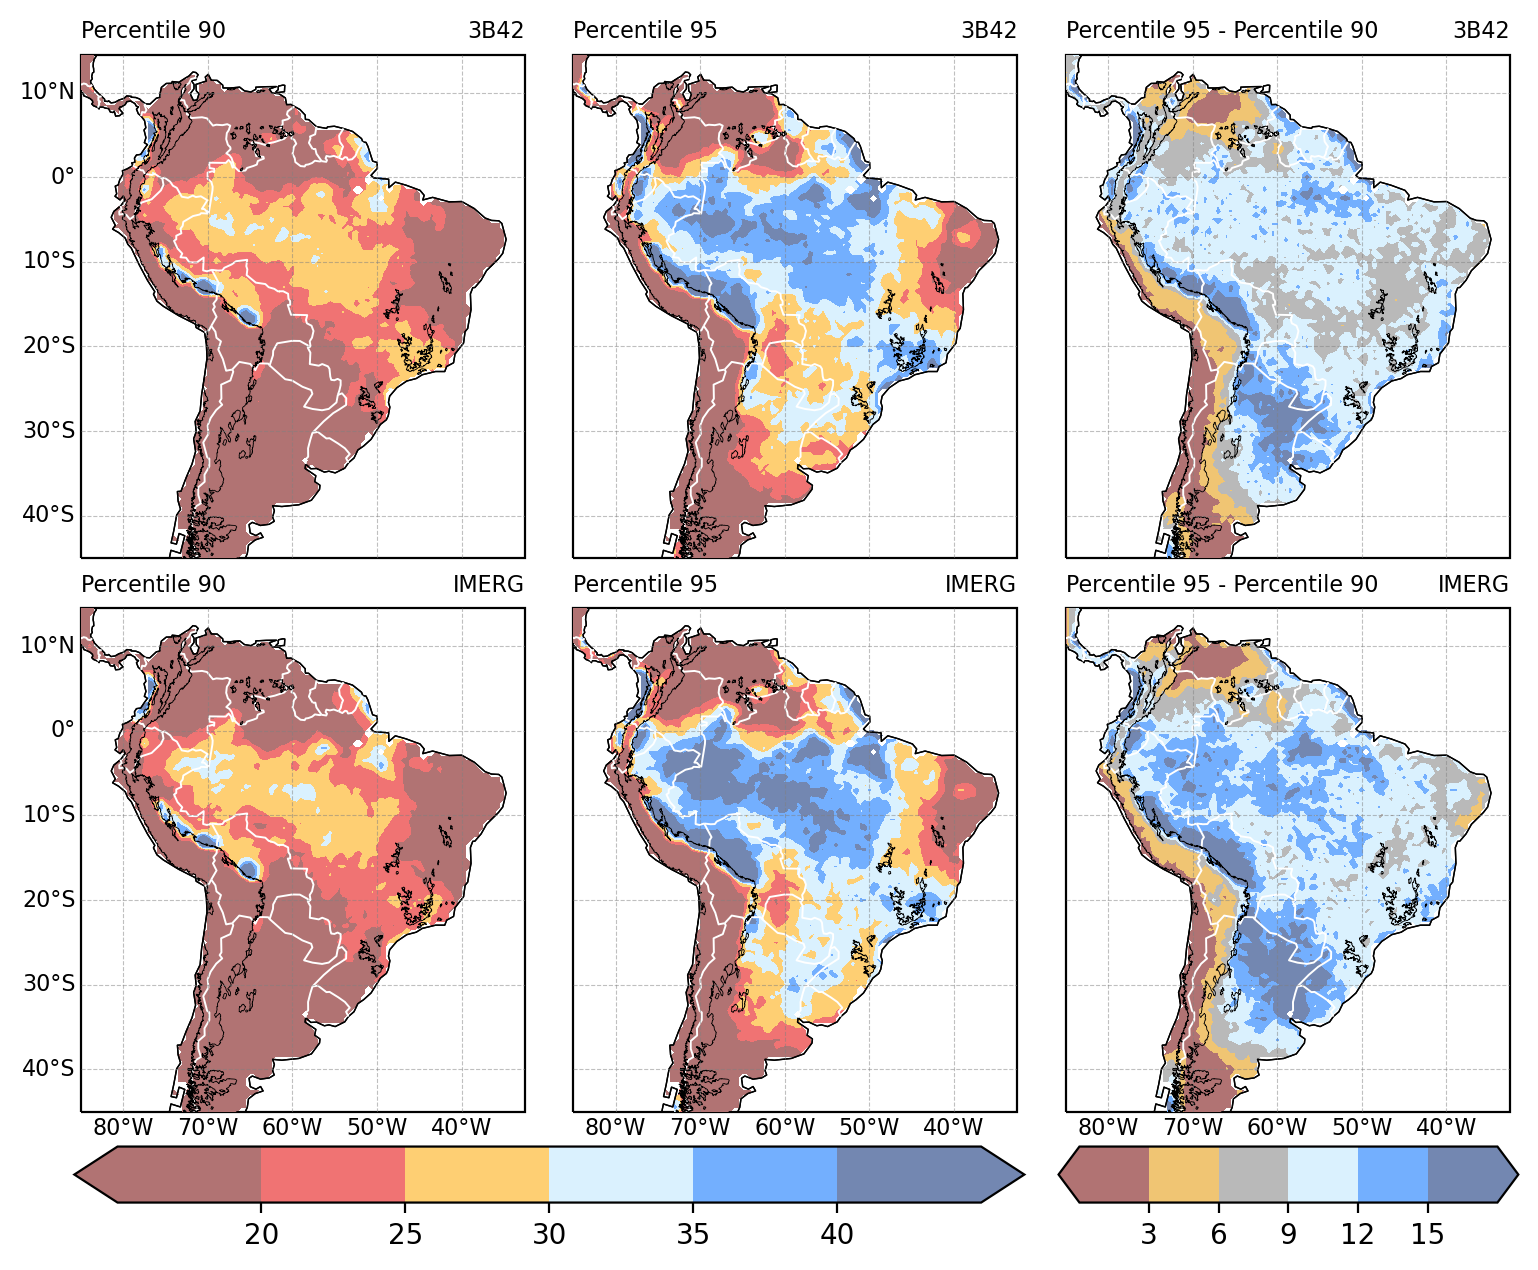

In [185]:
fontsize_title = 8
linewidth_shape = 0.3

levels_p = np.arange(15,50,5)
ticks_p = np.arange(20,45,5)

levels_diff = np.arange(0,21,3)
ticks_diff = np.arange(3,18,3)

cmap = plt.get_cmap('rainbow')

fontsize_axis = 8

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9.5,7),dpi=200)
gs = gridspec.GridSpec(2,3)

#================================================================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,pre_p90,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Percentile 90',fontsize=fontsize_title, loc='left')
ax1.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a1,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,pre_p95,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95',fontsize=fontsize_title, loc='left')
ax2.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a2,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[0, 2], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a3 = ax2.contourf(lon2d,lat2d,pre_p95-pre_p90,levels=levels_diff,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95 - Percentile 90',fontsize=fontsize_title, loc='left')
ax2.set_title('3B42',fontsize=fontsize_title, loc='right')
# plt.colorbar(a3,fraction=0.045,ticks=ticks_diff)

#================================================================================================================

ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.coastlines(linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d_I, lat2d_I,pre_p90_I,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax1.set_title('Percentile 90',fontsize=fontsize_title, loc='left')
ax1.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a1,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d_I, lat2d_I,pre_p95_I,levels=levels_p,cmap=cmp_boers_2013,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95',fontsize=fontsize_title, loc='left')
ax2.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a2,fraction=0.045,ticks=ticks_p)

ax2 = plt.subplot(gs[1, 2], projection = proj)
ax2.coastlines(linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.7,color='white',zorder=4)
ax2.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
# ax2.set_extent([-86,-30,-42,9])
a3 = ax2.contourf(lon2d_I, lat2d_I,pre_p95_I-pre_p90_I,levels=levels_diff,cmap=cmp_boers_2013_diff,zorder=3,extend='both')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.4,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize_axis, 'color': 'black'}
gl.ylabel_style = {'size': fontsize_axis, 'color': 'black'}
ax2.set_title('Percentile 95 - Percentile 90',fontsize=fontsize_title, loc='left')
ax2.set_title('IMERG',fontsize=fontsize_title, loc='right')
# plt.colorbar(a3,fraction=0.045,ticks=ticks_diff)

#================================================================================================================

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.01)

cbaxes = fig.add_axes([0.133, 0.060, 0.5, 0.04])
fig.colorbar(a1, cax = cbaxes,ticks=ticks_p,orientation="horizontal")

cbaxes = fig.add_axes([0.651, 0.060, 0.242, 0.04])
fig.colorbar(a3, cax = cbaxes,ticks=ticks_diff,orientation="horizontal")

salida = '../images/3B42_IMERG_summer_continent.png'
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.05, facecolor='white')